## Data Splitting

In [8]:
import os
import myutils

path2data = "./data"
#sub_folder_jpg = "hmdb51_jpg"
sub_folder_jpg = "HMDB51"
path2ajpgs = os.path.join(path2data, sub_folder_jpg)

In [9]:
ds_store_path = os.path.join('./data/HMDB51/.DS_Store')
if os.path.exists(ds_store_path):
    os.remove(ds_store_path)


all_vids, all_labels, catgs = myutils.get_vids(path2ajpgs) 
len(all_vids), len(all_labels), len(catgs)

(6817, 6817, 51)

In [14]:
#all_vids[:1], all_labels[:3], catgs[:5]
all_vids[:], all_labels[:], 
catgs[:]

['ride_bike',
 'kick',
 'smoke',
 'sword',
 'golf',
 'climb',
 'walk',
 'sword_exercise',
 'hit',
 'swing_baseball',
 'brush_hair',
 'ride_horse',
 'dive',
 'shoot_bow',
 'sit',
 'kiss',
 'jump',
 'hug',
 'pushup',
 'turn',
 'throw',
 'somersault',
 'push',
 'eat',
 'shake_hands',
 'pullup',
 'climb_stairs',
 'cartwheel',
 'fencing',
 'pour',
 'clap',
 'draw_sword',
 'catch',
 'kick_ball',
 'stand',
 'punch',
 'wave',
 'chew',
 'run',
 'shoot_ball',
 'shoot_gun',
 'situp',
 'handstand',
 'dribble',
 'fall_floor',
 'flic_flac',
 'drink',
 'pick',
 'smile',
 'laugh',
 'talk']

In [15]:
labels_dict = {}
ind = 0
for uc in catgs:
    labels_dict[uc] = ind
    ind+=1
labels_dict 

{'ride_bike': 0,
 'kick': 1,
 'smoke': 2,
 'sword': 3,
 'golf': 4,
 'climb': 5,
 'walk': 6,
 'sword_exercise': 7,
 'hit': 8,
 'swing_baseball': 9,
 'brush_hair': 10,
 'ride_horse': 11,
 'dive': 12,
 'shoot_bow': 13,
 'sit': 14,
 'kiss': 15,
 'jump': 16,
 'hug': 17,
 'pushup': 18,
 'turn': 19,
 'throw': 20,
 'somersault': 21,
 'push': 22,
 'eat': 23,
 'shake_hands': 24,
 'pullup': 25,
 'climb_stairs': 26,
 'cartwheel': 27,
 'fencing': 28,
 'pour': 29,
 'clap': 30,
 'draw_sword': 31,
 'catch': 32,
 'kick_ball': 33,
 'stand': 34,
 'punch': 35,
 'wave': 36,
 'chew': 37,
 'run': 38,
 'shoot_ball': 39,
 'shoot_gun': 40,
 'situp': 41,
 'handstand': 42,
 'dribble': 43,
 'fall_floor': 44,
 'flic_flac': 45,
 'drink': 46,
 'pick': 47,
 'smile': 48,
 'laugh': 49,
 'talk': 50}

In [16]:
num_classes = 51
unique_ids = [id_ for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
unique_labels = [label for id_, label in zip(all_vids,all_labels) if labels_dict[label]<num_classes]
len(unique_ids),len(unique_labels)

(6817, 6817)

In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=2, test_size=0.1, random_state=0)
train_indx, test_indx = next(sss.split(unique_ids, unique_labels))

train_ids = [unique_ids[ind] for ind in train_indx]
train_labels = [unique_labels[ind] for ind in train_indx]
print(len(train_ids), len(train_labels)) 

test_ids = [unique_ids[ind] for ind in test_indx]
test_labels = [unique_labels[ind] for ind in test_indx]
print(len(test_ids), len(test_labels))

521 521
58 58


In [86]:
train_ids[:5], train_labels[:5]

(['./data/HMDB51/kick/kick__Baddest_Fight_Scenes_EVER!_-_Kickboxer_-_Part_1_of_2_kick_u_cm_np1_ba_med_5',
  './data/HMDB51/kick/kick__bruce_lee_v_s_japanese_kick_u_cm_np1_ri_bad_0',
  './data/HMDB51/kick/kick__Baddest_Fight_Scenes_EVER!_-_Kickboxer_-_Part_1_of_2_kick_f_cm_np1_fr_med_0',
  './data/HMDB51/ride_bike/Yorki_Kassy_beim_Fahrrad_fahren_ride_bike_f_cm_np1_le_med_0',
  './data/HMDB51/sword/Fechten_mit_dem_langen_Schwert_sword_u_cm_np2_fr_med_4'],
 ['kick', 'kick', 'kick', 'ride_bike', 'sword'])

In [87]:
test_ids[:5], test_labels[:5]

(['./data/HMDB51/smoke/OSSER_-_Qualboro_light_-_Marlboro_Verarschung_smoke_h_cm_np1_le_bad_0',
  './data/HMDB51/golf/Huge_Drive!_Please_Rate_It_golf_f_cm_np1_ri_goo_0',
  './data/HMDB51/smoke/more_smoking_smoke_h_cm_np1_ri_med_1',
  './data/HMDB51/kick/The_Matrix_6_kick_f_nm_np1_fr_med_6',
  './data/HMDB51/smoke/you_like_a_nice_long_white_cig_smoke_u_nm_np1_ri_goo_2'],
 ['smoke', 'golf', 'smoke', 'kick', 'smoke'])

## Defining Dataset

In [88]:
from torch.utils.data import Dataset, DataLoader, Subset
import glob
from PIL import Image
import torch
import numpy as np
import random
np.random.seed(2020)
random.seed(2020)
torch.manual_seed(2020)

class VideoDataset(Dataset):
    def __init__(self, ids, labels, transform):      
        self.transform = transform
        self.ids = ids
        self.labels = labels
    def __len__(self):
        return len(self.ids)
    def __getitem__(self, idx):
        path2imgs=glob.glob(self.ids[idx]+"/*.jpg")
        path2imgs = path2imgs[:timesteps]
        label = labels_dict[self.labels[idx]]
        frames = []
        for p2i in path2imgs:
            frame = Image.open(p2i)
            frames.append(frame)
        
        seed = np.random.randint(1e9)        
        frames_tr = []
        for frame in frames:
            random.seed(seed)
            np.random.seed(seed)
            frame = self.transform(frame)
            frames_tr.append(frame)
        if len(frames_tr)>0:
            frames_tr = torch.stack(frames_tr)
        return frames_tr, label

In [89]:
# choose one
model_type = "3dcnn"
#model_type = "rnn"    

timesteps =16
if model_type == "rnn":
    h, w =224, 224
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
else:
    h, w = 112, 112
    mean = [0.43216, 0.394666, 0.37645]
    std = [0.22803, 0.22145, 0.216989]

In [90]:
import torchvision.transforms as transforms

train_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.RandomHorizontalFlip(p=0.5),  
            transforms.RandomAffine(degrees=0, translate=(0.1,0.1)),    
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ])     

In [91]:
train_ds = VideoDataset(ids= train_ids, labels= train_labels, transform= train_transformer)
print(len(train_ds))

521


In [92]:
imgs, label = train_ds[10]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([9, 3, 112, 112]), 1, tensor(-1.8952), tensor(2.3134))

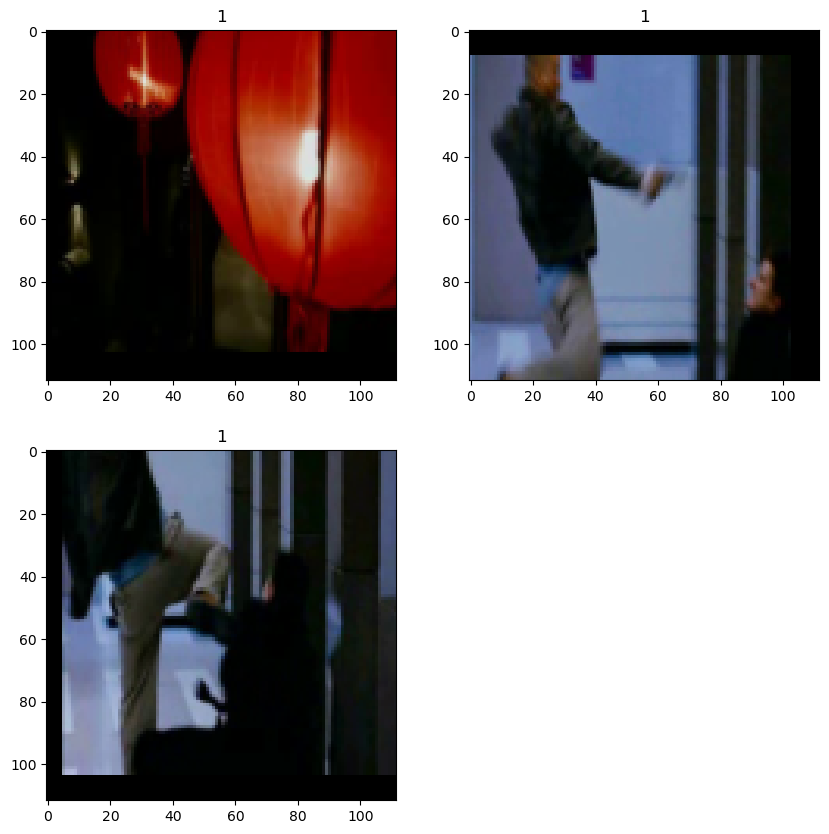

In [93]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.title(label)

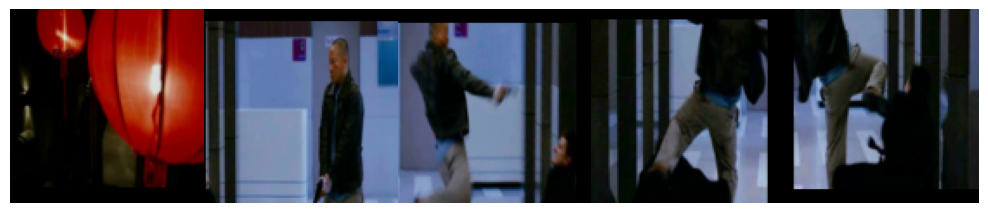

In [94]:
import matplotlib.pylab as plt
%matplotlib inline

plt.figure(figsize=(20,20))
plt.subplots_adjust(wspace=0, hspace=0)
for ii,img in enumerate(imgs[::2]):
    plt.subplot(1,8,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.axis("off")

In [95]:
test_transformer = transforms.Compose([
            transforms.Resize((h,w)),
            transforms.ToTensor(),
            transforms.Normalize(mean, std),
            ]) 
test_ds = VideoDataset(ids= test_ids, labels= test_labels, transform= test_transformer)
print(len(test_ds))

58


In [96]:
imgs, label = test_ds[5]
imgs.shape, label, torch.min(imgs), torch.max(imgs)

(torch.Size([16, 3, 112, 112]), 2, tensor(-1.8952), tensor(1.1488))

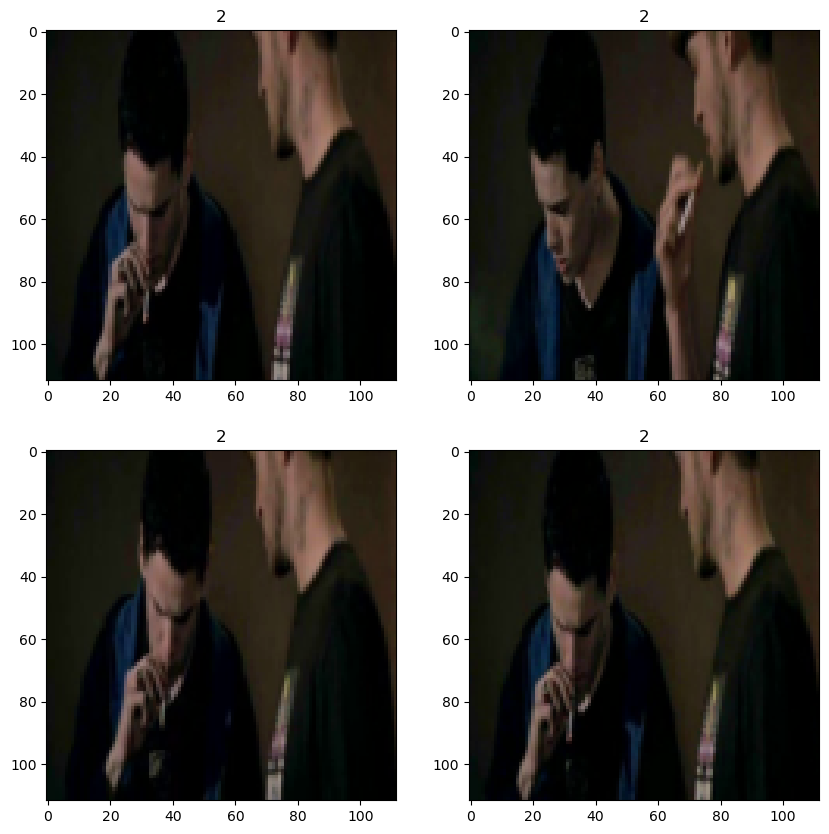

In [97]:
plt.figure(figsize=(10,10))
for ii,img in enumerate(imgs[::4]):
    plt.subplot(2,2,ii+1)
    plt.imshow(myutils.denormalize(img, mean, std))
    plt.title(label)

## Defining Data Loaders

In [98]:
def collate_fn_r3d_18(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    imgs_tensor = torch.transpose(imgs_tensor, 2, 1)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor

def collate_fn_rnn(batch):
    imgs_batch, label_batch = list(zip(*batch))
    imgs_batch = [imgs for imgs in imgs_batch if len(imgs)>0]
    label_batch = [torch.tensor(l) for l, imgs in zip(label_batch, imgs_batch) if len(imgs)>0]
    imgs_tensor = torch.stack(imgs_batch)
    labels_tensor = torch.stack(label_batch)
    return imgs_tensor,labels_tensor
    

batch_size = 1
if model_type == "rnn":
    train_dl = DataLoader(train_ds, batch_size= batch_size,
                          shuffle=True, collate_fn= collate_fn_rnn)
    test_dl = DataLoader(test_ds, batch_size= 2*batch_size,
                         shuffle=False, collate_fn= collate_fn_rnn)  
else:
    train_dl = DataLoader(train_ds, batch_size= batch_size, 
                          shuffle=True, collate_fn= collate_fn_r3d_18)
    test_dl = DataLoader(test_ds, batch_size= 2*batch_size, 
                         shuffle=False, collate_fn= collate_fn_r3d_18)          

In [99]:
for xb,yb in train_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([1, 3, 13, 112, 112]) torch.Size([1])


In [100]:
for xb,yb in test_dl:
    print(xb.shape, yb.shape)
    break

torch.Size([2, 3, 16, 112, 112]) torch.Size([2])


## Defining Model

In [101]:
from torch import nn
class Resnt18Rnn(nn.Module):
    def __init__(self, params_model):
        super(Resnt18Rnn, self).__init__()
        num_classes = params_model["num_classes"]
        dr_rate= params_model["dr_rate"]
        pretrained = params_model["pretrained"]
        rnn_hidden_size = params_model["rnn_hidden_size"]
        rnn_num_layers = params_model["rnn_num_layers"]
        
        baseModel = models.resnet18(pretrained=pretrained)
        num_features = baseModel.fc.in_features
        baseModel.fc = Identity()
        self.baseModel = baseModel
        self.dropout= nn.Dropout(dr_rate)
        self.rnn = nn.LSTM(num_features, rnn_hidden_size, rnn_num_layers)
        self.fc1 = nn.Linear(rnn_hidden_size, num_classes)
    def forward(self, x):
        b_z, ts, c, h, w = x.shape
        ii = 0
        y = self.baseModel((x[:,ii]))
        output, (hn, cn) = self.rnn(y.unsqueeze(1))
        for ii in range(1, ts):
            y = self.baseModel((x[:,ii]))
            out, (hn, cn) = self.rnn(y.unsqueeze(1), (hn, cn))
        out = self.dropout(out[:,-1])
        out = self.fc1(out) 
        return out 
    
class Identity(nn.Module):
    def __init__(self):
        super(Identity, self).__init__()
    def forward(self, x):
        return x    

In [102]:
from torchvision import models
from torch import nn

if model_type == "rnn":
    params_model={
        "num_classes": num_classes,
        "dr_rate": 0.1,
        "pretrained" : True,
        "rnn_num_layers": 1,
        "rnn_hidden_size": 100,}
    model = Resnt18Rnn(params_model)        
else:
    model = models.video.r3d_18(pretrained=True, progress=False)
    num_features = model.fc.in_features
    model.fc = nn.Linear(num_features, num_classes)

/Users/owo/anaconda3/envs/torchenv/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/owo/anaconda3/envs/torchenv/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=R3D_18_Weights.KINETICS400_V1`. You can also use `weights=R3D_18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [103]:
with torch.no_grad():
    if model_type=="rnn":
        x = torch.zeros(1, 16, 3, h, w)
    else:
        x = torch.zeros(1, 3, 16, h, w)
    y= model(x)
    print(y.shape)

torch.Size([1, 5])


In [104]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [105]:
model

VideoResNet(
  (stem): BasicStem(
    (0): Conv3d(3, 64, kernel_size=(3, 7, 7), stride=(1, 2, 2), padding=(1, 3, 3), bias=False)
    (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
      )
      (conv2): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (relu): ReLU(inplace=True)
    )
    (1): BasicBlock(
      (conv1): Sequential(
        (0): Conv3DSimple(64, 64, kernel_size=(3, 3, 3), stride=(1, 1, 1), padding=(1, 1, 1), bias=False)
        (1):

In [106]:
path2weights = "./models/weights.pt"
torch.save(model.state_dict(), path2weights)

## Training Model

In [107]:
from torch import optim
from torch.optim.lr_scheduler import CosineAnnealingLR, ReduceLROnPlateau

loss_func = nn.CrossEntropyLoss(reduction="sum")
opt = optim.Adam(model.parameters(), lr=3e-5)
lr_scheduler = ReduceLROnPlateau(opt, mode='min',factor=0.5, patience=5,verbose=1)
os.makedirs("./models", exist_ok=True)

params_train={
    "num_epochs": 20,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": test_dl,
    "sanity_check": True,
    "lr_scheduler": lr_scheduler,
    "path2weights": "./models/weights_"+model_type+".pt",
    }
model,loss_hist,metric_hist = myutils.train_val(model,params_train)

Epoch 0/19, current lr=3e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Copied best model weights!
train loss: 0.002362, dev loss: 0.075038, accuracy: 0.00
----------
Epoch 1/19, current lr=3e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.002388, dev loss: 0.075960, accuracy: 0.00
----------
Epoch 2/19, current lr=3e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.003382, dev loss: 0.078941, accuracy: 0.00
----------
Epoch 3/19, current lr=3e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.003005, dev loss: 0.082177, accuracy: 0.00
----------
Epoch 4/19, current lr=3e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.003009, dev loss: 0.084046, accuracy: 0.00
----------
Epoch 5/19, current lr=3e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.002287, dev loss: 0.083873, accuracy: 0.00
----------
Epoch 6/19, current lr=3e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Epoch 00007: reducing learning rate of group 0 to 1.5000e-05.
Loading best model weights!
train loss: 0.002269, dev loss: 0.084969, accuracy: 0.00
----------
Epoch 7/19, current lr=1.5e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.004279, dev loss: 0.078365, accuracy: 0.00
----------
Epoch 8/19, current lr=1.5e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.002370, dev loss: 0.081726, accuracy: 0.00
----------
Epoch 9/19, current lr=1.5e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.002986, dev loss: 0.084312, accuracy: 0.00
----------
Epoch 10/19, current lr=1.5e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.002360, dev loss: 0.086527, accuracy: 0.00
----------
Epoch 11/19, current lr=1.5e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.003344, dev loss: 0.088148, accuracy: 0.00
----------
Epoch 12/19, current lr=1.5e-05


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Epoch 00013: reducing learning rate of group 0 to 7.5000e-06.
Loading best model weights!
train loss: 0.003340, dev loss: 0.089994, accuracy: 0.00
----------
Epoch 13/19, current lr=7.5e-06


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.003377, dev loss: 0.078304, accuracy: 0.00
----------
Epoch 14/19, current lr=7.5e-06


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.003355, dev loss: 0.081745, accuracy: 0.00
----------
Epoch 15/19, current lr=7.5e-06


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.004206, dev loss: 0.083632, accuracy: 0.00
----------
Epoch 16/19, current lr=7.5e-06


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.003327, dev loss: 0.084132, accuracy: 0.00
----------
Epoch 17/19, current lr=7.5e-06


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.002302, dev loss: 0.085575, accuracy: 0.00
----------
Epoch 18/19, current lr=7.5e-06


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

Epoch 00019: reducing learning rate of group 0 to 3.7500e-06.
Loading best model weights!
train loss: 0.003319, dev loss: 0.086453, accuracy: 0.00
----------
Epoch 19/19, current lr=3.75e-06


  0%|          | 0/521 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

train loss: 0.002994, dev loss: 0.076789, accuracy: 0.00
----------


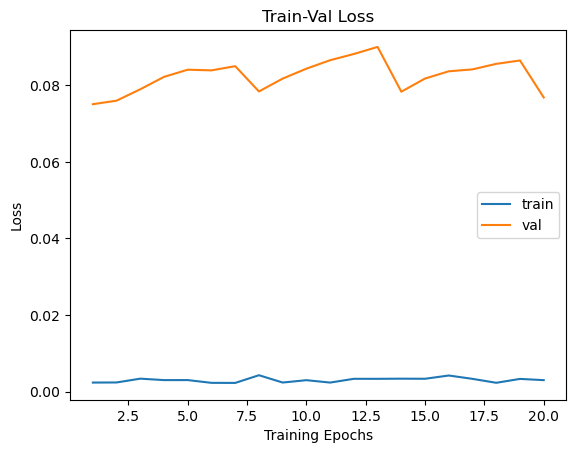

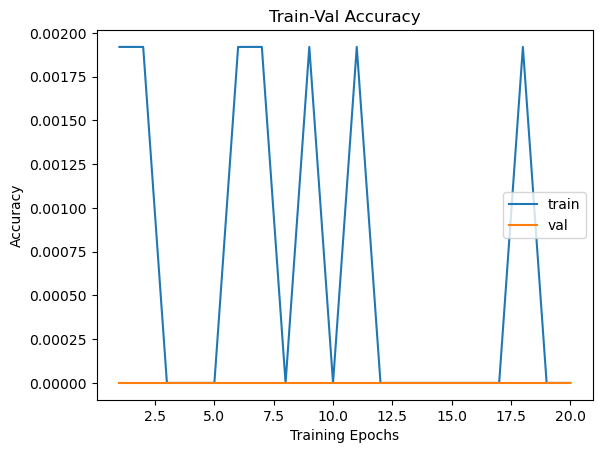

In [108]:
myutils.plot_loss(loss_hist, metric_hist)